In [10]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotnine import *
import pandas as pd 


# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [23]:
loci=["BCL11A","HBA2","HBE1","LMO2","MYC","RBM38"]
source_dir_fc_regression="regression.1kb.FClayer.embeddings.gc.corrected"
source_dir_fc_classification="classification.1kb.FClayer.embeddings.gc.corrected"
source_dir_conv1_regression="regression.1kb.Conv1layer.embeddings.gc.corrected"
source_dir_conv1_classification="classification.1kb.Conv1layer.embeddings.gc.corrected"
FC_suffix_regression="_FC_layer_NN_embeddings.regression.gc.npz"
Conv_suffix_regression="_CONV1_layer_NN_embeddings.regression.gc.npz"
FC_suffix_classification="_FC_layer_NN_embeddings.classification.gc.npz"
Conv_suffix_classification="_CONV1_layer_NN_embeddings.classification.gc.npz"

## Regression

### FC Layer embeddings

BCL11A


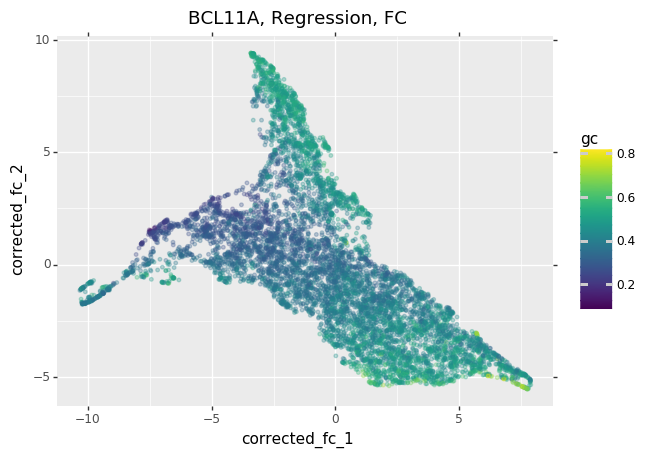

<ggplot: (8734169436522)>
HBA2


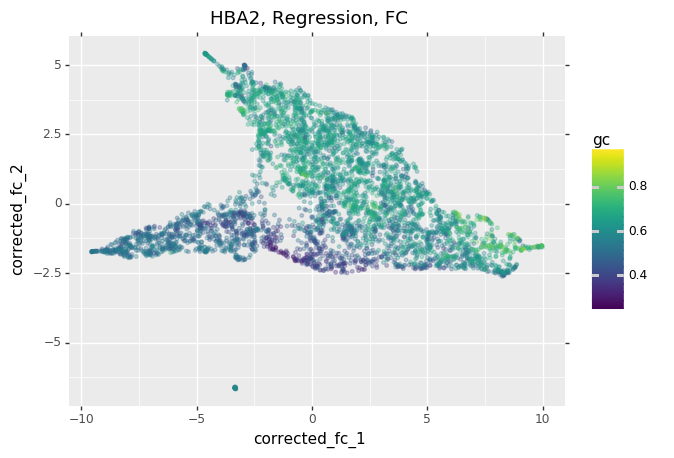

<ggplot: (-9223363302803895499)>
HBE1


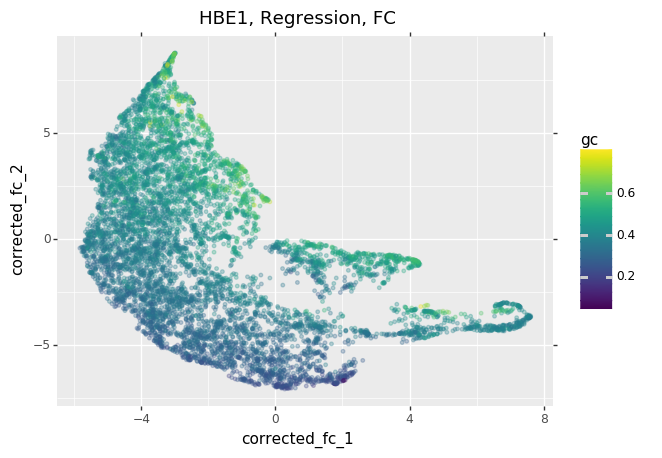

<ggplot: (8734178305449)>
LMO2


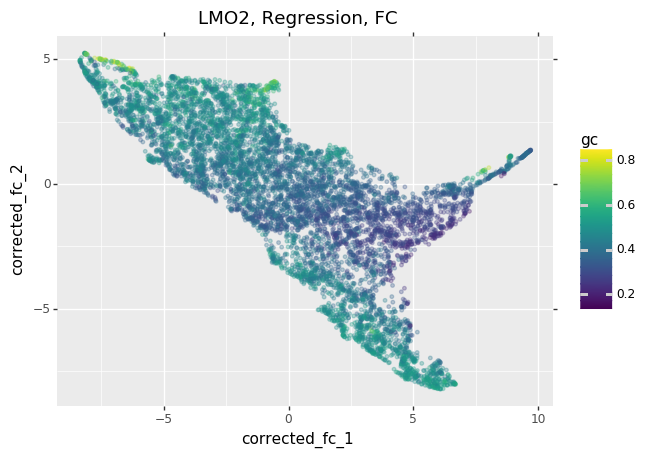

<ggplot: (-9223363302674220677)>
MYC


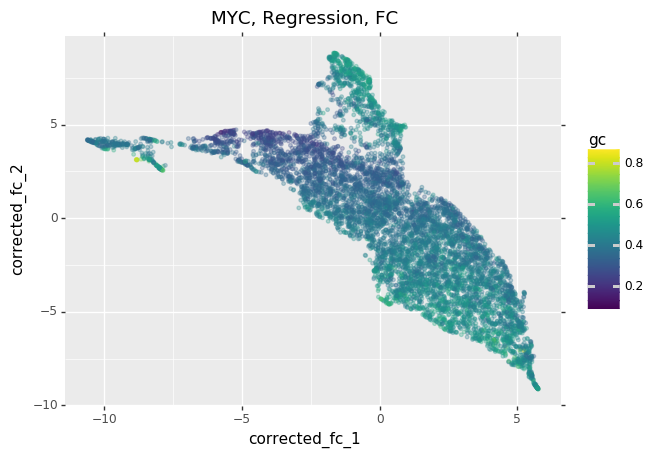

<ggplot: (8734169557000)>
RBM38


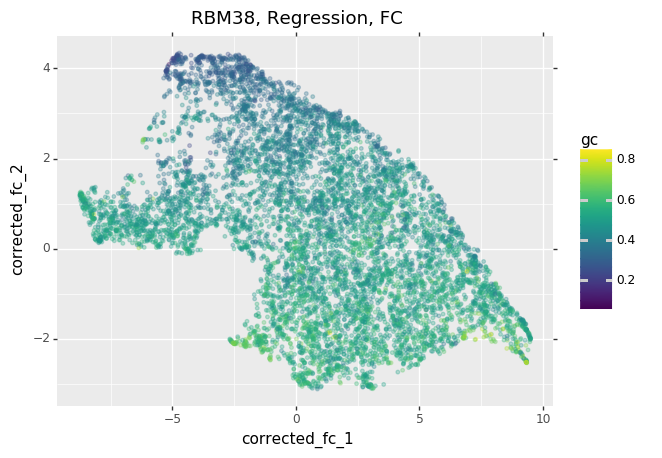

<ggplot: (-9223363302674106045)>


In [17]:
for locus in loci:
    fname='/'.join([source_dir_fc_regression, locus+FC_suffix_regression])
    data_pickle=np.load(fname,allow_pickle=True)
    bed_entries=data_pickle['bed_entries']
    embeddings=data_pickle['embeddings']
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    #add gc column to embedding 
    embeddings_with_gc=np.concatenate((embeddings,gc_vals),axis=1)
    corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(embeddings_with_gc)
    df_fc=pd.DataFrame.from_dict({'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print(locus)
    print((ggplot(df_fc,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
     geom_point(size=1,alpha=0.3)+
     ggtitle(locus+", Regression, FC")))


### CONV1 layer embeddings 

BCL11A


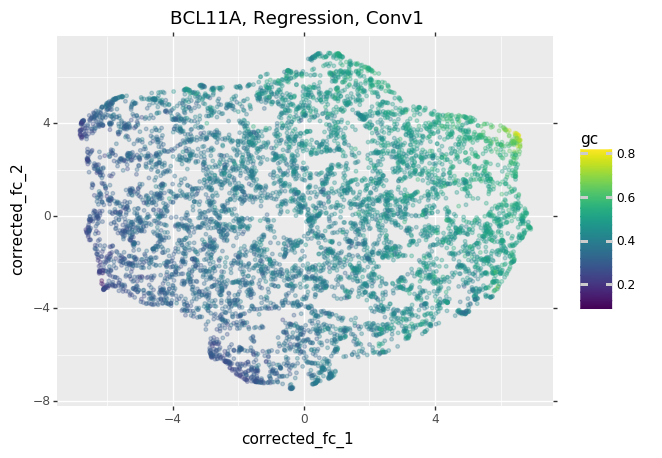

<ggplot: (8734175728858)>
HBA2


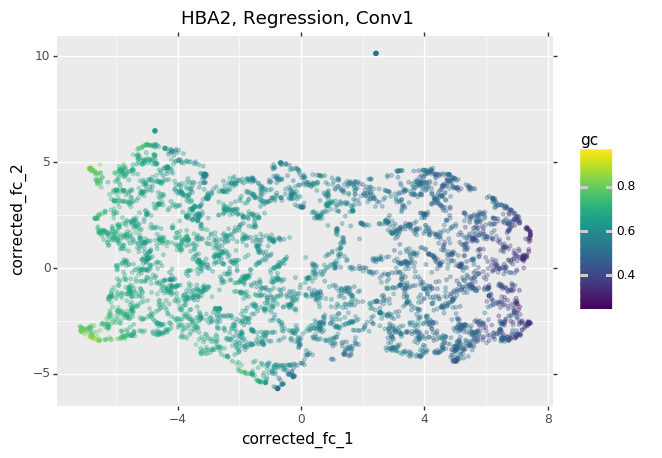

<ggplot: (8734170759607)>
HBE1


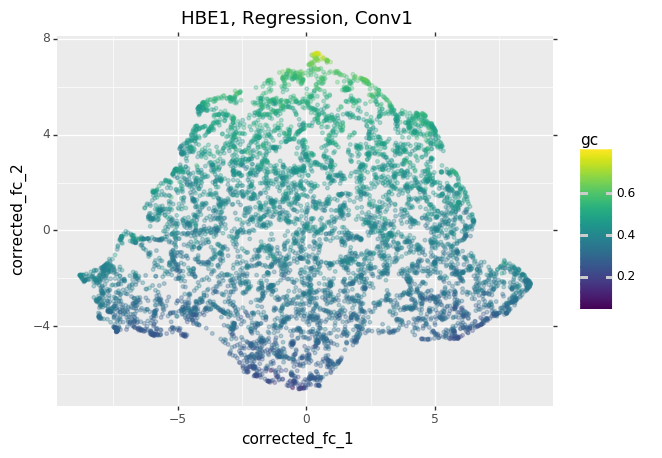

<ggplot: (8734180751778)>
LMO2


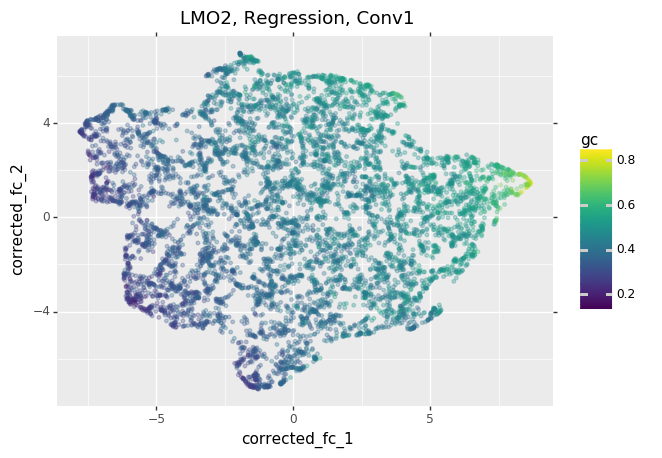

<ggplot: (-9223363302674292494)>
MYC


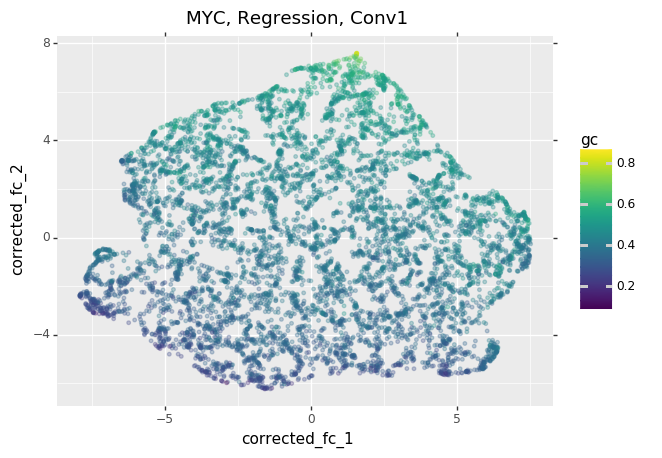

<ggplot: (-9223363302674292732)>
RBM38


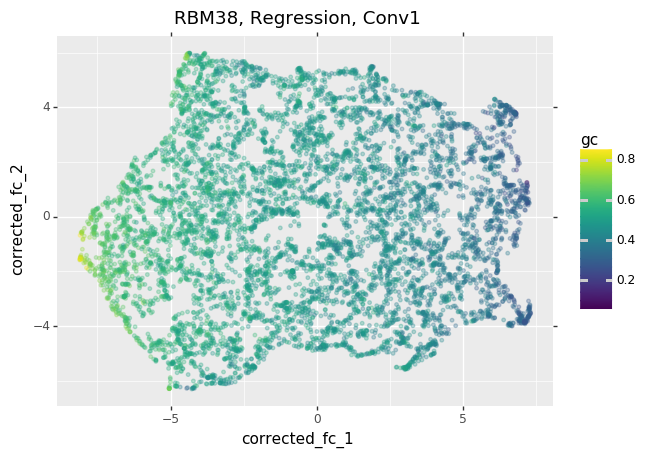

<ggplot: (8734050826465)>


In [18]:
for locus in loci:
    fname='/'.join([source_dir_conv1_regression, locus+Conv_suffix_regression])
    data_pickle=np.load(fname,allow_pickle=True)
    bed_entries=data_pickle['bed_entries']
    embeddings=data_pickle['embeddings']
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    #add gc column to embedding 
    embeddings_with_gc=np.concatenate((embeddings,gc_vals),axis=1)
    corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(embeddings_with_gc)
    df_fc=pd.DataFrame.from_dict({'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print(locus)
    print((ggplot(df_fc,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
     geom_point(size=1,alpha=0.3)+
     ggtitle(locus+", Regression, Conv1")))


## Classification Model 

### FC layer embeddings 

BCL11A


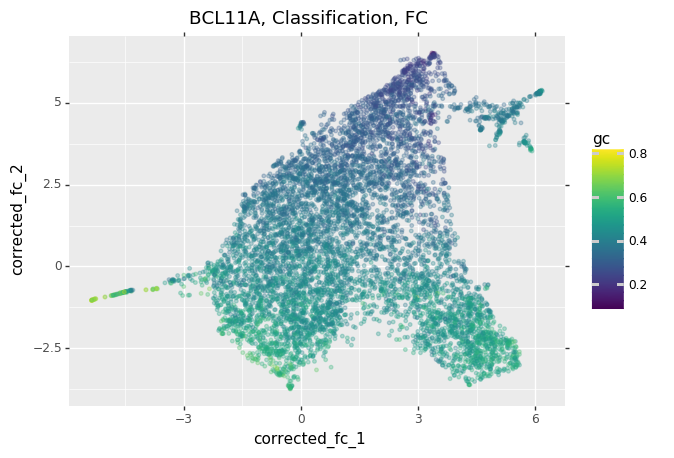

<ggplot: (-9223363302803949501)>
HBA2


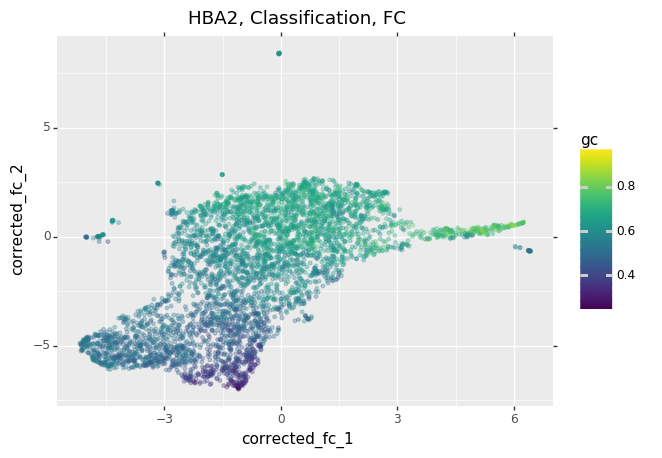

<ggplot: (-9223363302674267076)>
HBE1


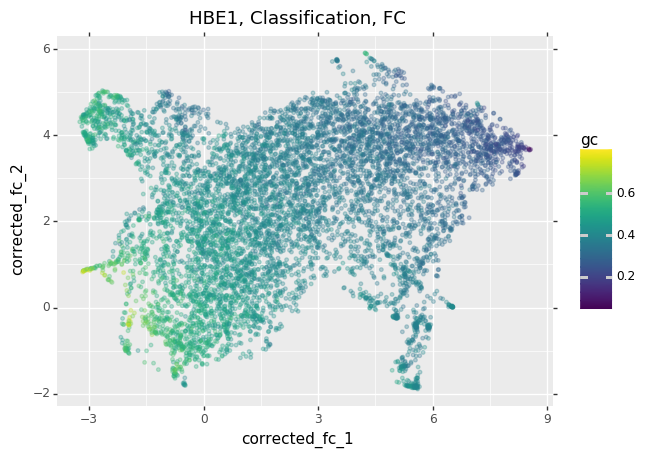

<ggplot: (-9223363302674112326)>
LMO2


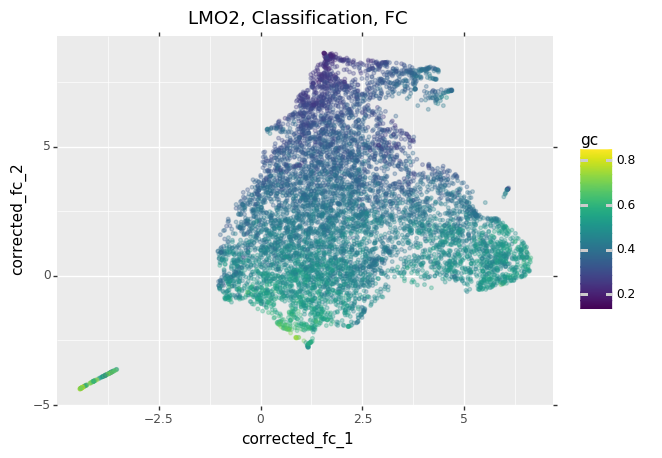

<ggplot: (-9223363302674254241)>
MYC


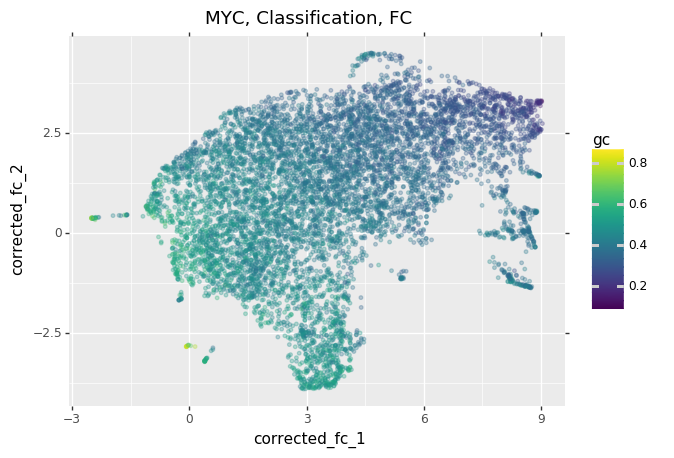

<ggplot: (-9223363302674211419)>
RBM38


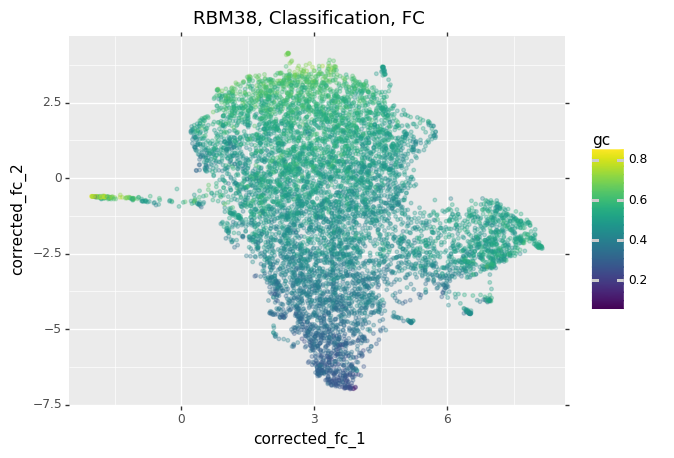

<ggplot: (-9223363302674112326)>


In [21]:
for locus in loci:
    fname='/'.join([source_dir_fc_classification, locus+FC_suffix_classification])
    data_pickle=np.load(fname,allow_pickle=True)
    bed_entries=data_pickle['bed_entries']
    embeddings=data_pickle['embeddings']
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    #add gc column to embedding 
    embeddings_with_gc=np.concatenate((embeddings,gc_vals),axis=1)
    corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(embeddings_with_gc)
    df_fc=pd.DataFrame.from_dict({'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print(locus)
    print((ggplot(df_fc,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
     geom_point(size=1,alpha=0.3)+
     ggtitle(locus+", Classification, FC")))


### Conv1 layer embeddings 

BCL11A


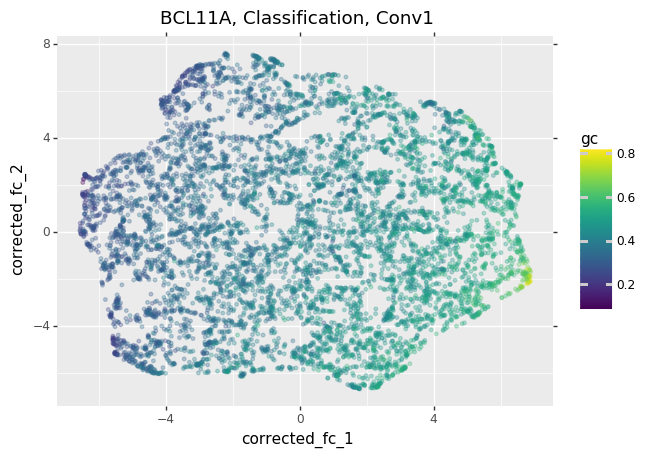

<ggplot: (-9223363302804023692)>
HBA2


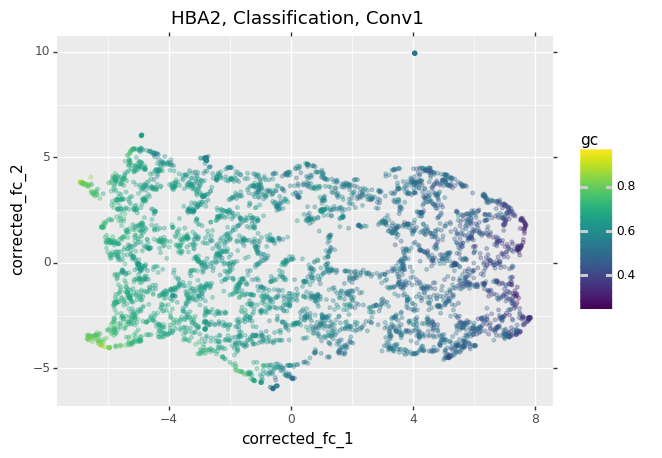

<ggplot: (-9223363302804023671)>
HBE1


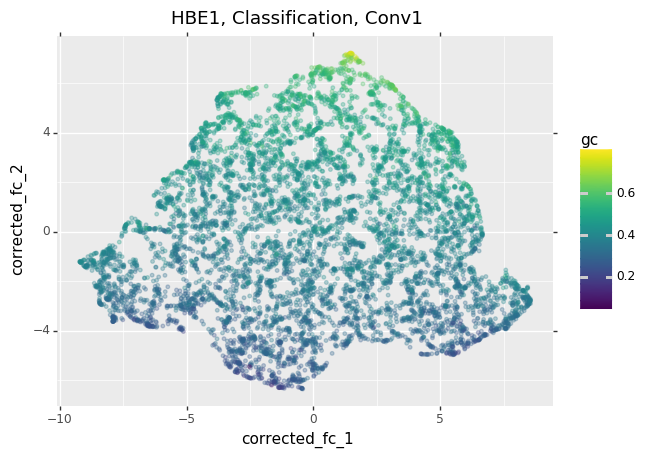

<ggplot: (8734169385508)>
LMO2


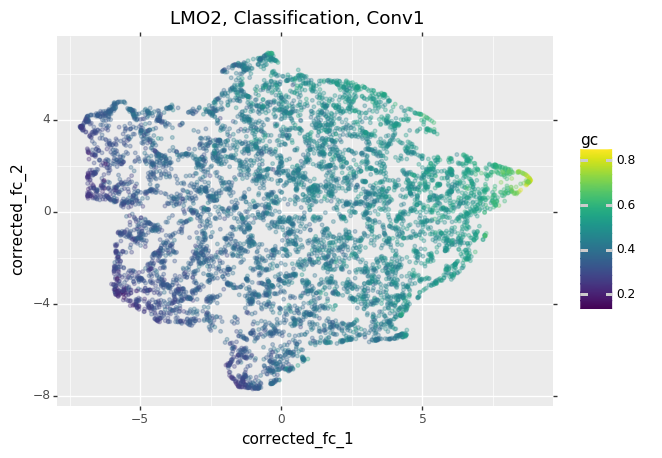

<ggplot: (8734227246351)>
MYC


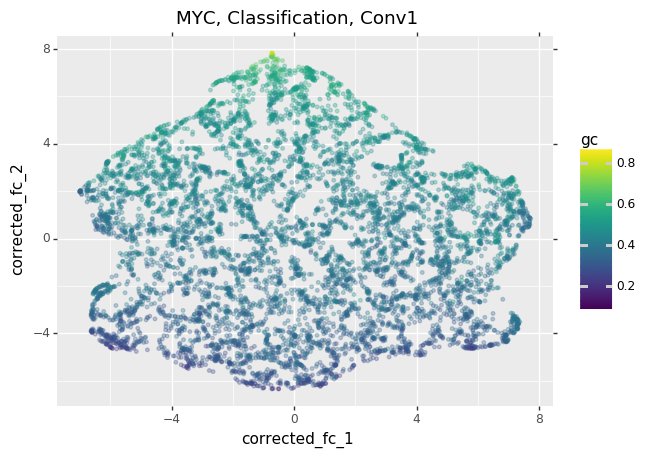

<ggplot: (8734169385508)>
RBM38


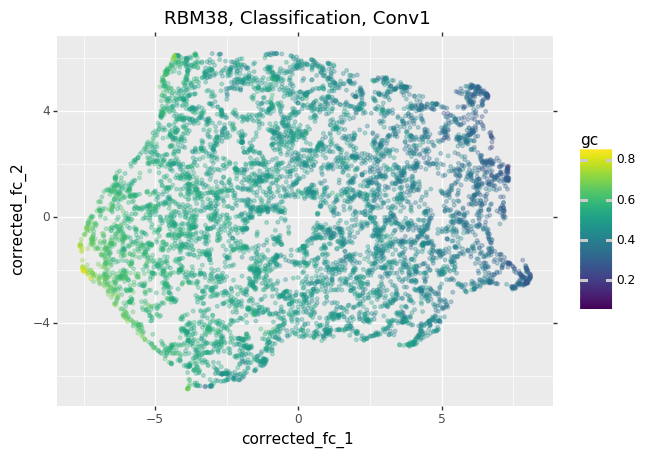

<ggplot: (-9223363302684027448)>


In [24]:
for locus in loci:
    fname='/'.join([source_dir_conv1_classification, locus+Conv_suffix_classification])
    data_pickle=np.load(fname,allow_pickle=True)
    bed_entries=data_pickle['bed_entries']
    embeddings=data_pickle['embeddings']
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    #add gc column to embedding 
    embeddings_with_gc=np.concatenate((embeddings,gc_vals),axis=1)
    corrected_fc_embeddings_2d = umap.UMAP(random_state=42).fit_transform(embeddings_with_gc)
    df_fc=pd.DataFrame.from_dict({'corrected_fc_1':corrected_fc_embeddings_2d[:,0],
                              'corrected_fc_2':corrected_fc_embeddings_2d[:,1],
                              'gc':gc_vals.squeeze()})
    print(locus)
    print((ggplot(df_fc,aes(x='corrected_fc_1', y='corrected_fc_2',color='gc'))+
     geom_point(size=1,alpha=0.3)+
     ggtitle(locus+", Classification, Conv1")))
